In [13]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.model_selection import train_test_split


In [14]:
raw_df = pd.DataFrame(
    [
        [2  ,12],
        [3  ,5 ],
        [8  ,4 ],
        [6  ,13],

        [13 ,5 ],
        [10 ,6 ],
        [2  ,2 ],
        [4  ,13],
    ],
    index=['A1','A2','A3','A4','A5','A6','A7','A8',],
    columns=['x','y']
)
raw_df

,x,y
A1,2,12
A2,3,5
A3,8,4
A4,6,13
A5,13,5
A6,10,6
A7,2,2
A8,4,13


centroids [[ 6 13]
 [ 2  2]
 [ 4 13]]
labels [2 1 1 0 0 0 1 2]
iterations 0


C:\Users\No1\AppData\Local\Temp\ipykernel_19512\193744424.py:25: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=raw_df['x'],y=raw_df['y'], hue=pred,


<AxesSubplot:xlabel='x', ylabel='y'>

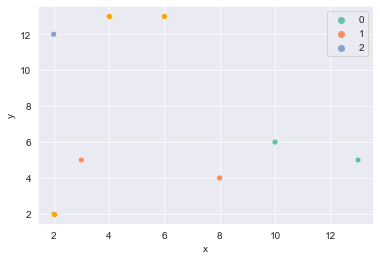

In [15]:
def fit(X, n_it, centroids=None, k_c=3):
    if centroids is None:
        centroids = X[np.random.choice(X.shape[0], k_c, replace=False), :]
    labels = np.argmin(
        np.sum( ( X[:, None, :]-centroids[None, :, :] )**2, axis=2), axis=1)
    stop=0;k=0
    for k in range(1,n_it+1):
        labels2 = np.argmin(
            np.sum( ( X[:, None, :]-centroids[None, :, :] )**2, axis=2), axis=1)
        centroids2 = np.array([
            X[labels2 == i].mean(axis=0) for i in range(len(centroids))]
        )
        if (centroids2==centroids).all() and (labels==labels2).all():
            stop=1
            break
        centroids = centroids2
        labels = labels2

    return centroids, labels, k-1*stop

cen,pred, s_i = fit(raw_df.values, 0, centroids=raw_df.loc[['A4','A7','A8'],:].values)
print('centroids',cen,)
print('labels',pred)
print('iterations',s_i)
sns.scatterplot(x=raw_df['x'],y=raw_df['y'], hue=pred,
                palette=sns.color_palette("Set2"))
sns.scatterplot(x=cen[:,0],y=cen[:,1], color='orange')

centroids [[ 9.66666667  8.        ]
 [ 4.33333333  3.66666667]
 [ 3.         12.5       ]]
labels [2 1 1 0 0 0 1 2]
iterations 1


C:\Users\No1\AppData\Local\Temp\ipykernel_19512\2554641500.py:5: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=raw_df['x'],y=raw_df['y'], hue=pred,


<AxesSubplot:xlabel='x', ylabel='y'>

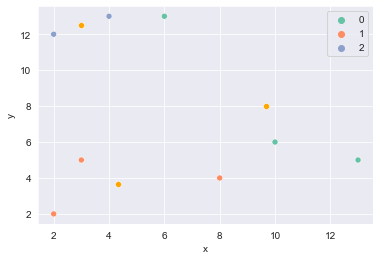

In [16]:

cen,pred, s_i = fit(raw_df.values, 1, centroids=raw_df.loc[['A4','A7','A8'],:].values)
print('centroids',cen,)
print('labels',pred)
print('iterations',s_i)
sns.scatterplot(x=raw_df['x'],y=raw_df['y'], hue=pred,
                palette=sns.color_palette("Set2"))
sns.scatterplot(x=cen[:,0],y=cen[:,1], color='orange')

centroids [[11.5         5.5       ]
 [ 4.33333333  3.66666667]
 [ 4.         12.66666667]]
labels [2 1 1 2 0 0 1 2]
iterations 2


C:\Users\No1\AppData\Local\Temp\ipykernel_19512\2476372454.py:5: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=raw_df['x'],y=raw_df['y'], hue=pred,


<AxesSubplot:xlabel='x', ylabel='y'>

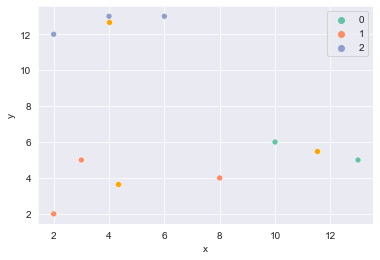

In [17]:
cen,pred, s_i = fit(raw_df.values, 100, centroids=raw_df.loc[['A4','A7','A8'],:].values)
print('centroids',cen,)
print('labels',pred)
print('iterations',s_i)
sns.scatterplot(x=raw_df['x'],y=raw_df['y'], hue=pred,
                palette=sns.color_palette("Set2"))
sns.scatterplot(x=cen[:,0],y=cen[:,1], color='orange')

centroids [[ 4.         12.66666667]
 [ 2.5         3.5       ]
 [10.33333333  5.        ]]
labels [0 1 2 0 2 2 1 0]
iterations 1


C:\Users\No1\AppData\Local\Temp\ipykernel_19512\249347682.py:5: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=raw_df['x'],y=raw_df['y'], hue=pred,


<AxesSubplot:xlabel='x', ylabel='y'>

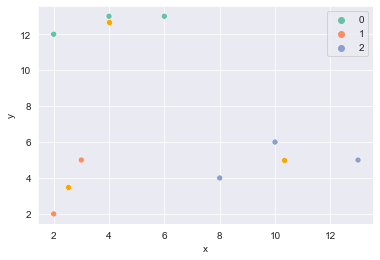

In [18]:
cen,pred, s_i = fit(raw_df.values, 100)
print('centroids',cen,)
print('labels',pred)
print('iterations',s_i)
sns.scatterplot(x=raw_df['x'],y=raw_df['y'], hue=pred,
                palette=sns.color_palette("Set2"))
sns.scatterplot(x=cen[:,0],y=cen[:,1], color='orange')